# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [28]:
data.shape[0] - data.notnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [36]:
discrete_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
data[discrete_cols] = data[discrete_cols].fillna(data[discrete_cols].median())

In [57]:
contin_cols = ['BMI']
data[contin_cols] = data[contin_cols].fillna(data[contin_cols].mean())

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [60]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [65]:
len(data[(data['Age'] > 50) & (data['Class'] == 1)])

38

__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [72]:
data.sort_values('Pregnancies',ascending=False)[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [73]:
len(data[(data['Age'] < 30) & (data['Pregnancies'] >= 3)])

117

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [79]:
100 * len(data[(data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]) / data.shape[0]

18.880208333333332

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [82]:
len(data[(data['BloodPressure'] >= data['BloodPressure'].mean()) & (data['BMI'] >= 30)])

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [87]:
# Glucose
print(f"Glucose with diabetes: {data['Glucose'][data['Class'] == 1].mean()}")
print(f"Glucose without diabetes: {data['Glucose'][data['Class'] == 0].mean()}")

Glucose with diabetes: 142.13059701492537
Glucose without diabetes: 110.682


In [88]:
# BloodPressure
print(f"BloodPressure with diabetes: {data['BloodPressure'][data['Class'] == 1].mean()}")
print(f"BloodPressure without diabetes: {data['BloodPressure'][data['Class'] == 0].mean()}")

BloodPressure with diabetes: 75.1231343283582
BloodPressure without diabetes: 70.92


In [89]:
# Insulin
print(f"Insulin with diabetes: {data['Insulin'][data['Class'] == 1].mean()}")
print(f"Insulin without diabetes: {data['Insulin'][data['Class'] == 0].mean()}")

Insulin with diabetes: 164.70149253731344
Insulin without diabetes: 127.792


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

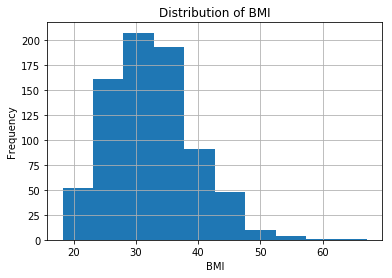

In [94]:
plot = data['BMI'].hist()
plot.set_title('Distribution of BMI')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')

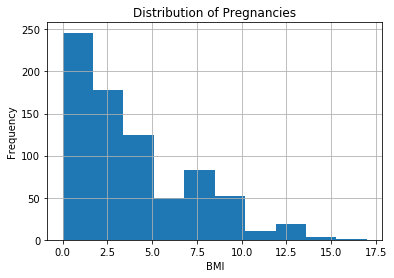

In [96]:
plot = data['Pregnancies'].hist()
plot.set_title('Distribution of Pregnancies')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

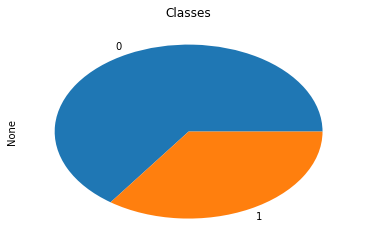

In [108]:
data.groupby('Class').size().plot('pie',  title = 'Classes')

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

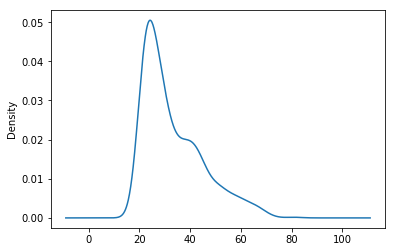

In [110]:
data['Age'].plot.density()
plot.set_title('Distribution of Age')

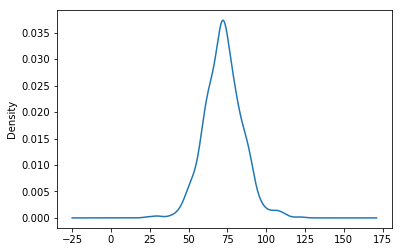

In [111]:
data['BloodPressure'].plot.density()
plot.set_title('Distribution of Blood Pressure')

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

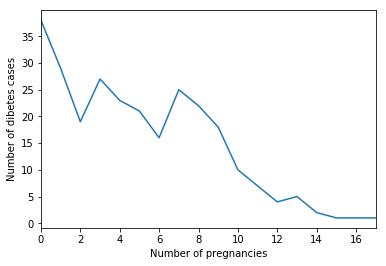

In [125]:
plot = data[data['Class'] == 1].groupby('Pregnancies')['Class'].sum().plot()
plot.set_ylabel('Number of dibetes cases')
plot.set_xlabel('Number of pregnancies')

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [127]:
data['wasPregnant'] = data['Pregnancies'].apply(lambda x: 1 if x > 0 else 0)

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [136]:
len(data['Class'] == 1)

768

In [137]:
print(f"Were pregnant: {100 * len(data[(data['wasPregnant'] == 1) & (data['Class'] == 1)]) / len(data[data['Class'] == 1])}")
print(f"Were not pregnant: {100 * len(data[(data['wasPregnant'] == 0) & (data['Class'] == 1)]) / len(data[data['Class'] == 1])}")

Were pregnant: 85.82089552238806
Were not pregnant: 14.17910447761194


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [141]:
bodyType = []
for value in data['BMI']:
    if value <= 18.5:
        bodyType.append('Underweight')
    elif value > 18.5 and value <= 24.9:
        bodyType.append('Normal weight')
    elif value >= 25 and value <= 29.9:
        bodyType.append('Overweight')
    elif value >= 30:
        bodyType.append('Obesity')
        
data['bodyType'] = bodyType

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [158]:
healthy = data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]
len(healthy[healthy['Class'] == 1]) / len(healthy) * 100

10.0